In [17]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum

In [18]:
bn = gum.BayesNet("Fische")
# Variablen
a = bn.add(gum.LabelizedVariable('a', 'Jahreszeiten', 4))
b = bn.add(gum.LabelizedVariable('b', 'Ort', 2))
x = bn.add(gum.LabelizedVariable('x', 'Fischart', 2))
c = bn.add(gum.LabelizedVariable('c', 'Farbe', 3))
d = bn.add(gum.LabelizedVariable('d', 'Dicke', 2))

In [19]:
# Verbindungen
bn.addArc(a, x)
bn.addArc(b, x)
bn.addArc(x, c)
bn.addArc(x, d)

In [20]:
# Wahrscheinlichkeiten
bn.cpt(a).fillWith([0.25, 0.25, 0.25, 0.25])
bn.cpt(b).fillWith([0.6, 0.4])

bn.cpt(x)[{'a': 0, 'b': 0}] = [0.5, 0.5]
bn.cpt(x)[{'a': 0, 'b': 1}] = [0.7, 0.3]
bn.cpt(x)[{'a': 1, 'b': 0}] = [0.6, 0.4]
bn.cpt(x)[{'a': 1, 'b': 1}] = [0.8, 0.2]
bn.cpt(x)[{'a': 2, 'b': 0}] = [0.4, 0.6]
bn.cpt(x)[{'a': 2, 'b': 1}] = [0.1, 0.9]
bn.cpt(x)[{'a': 3, 'b': 0}] = [0.2, 0.8]
bn.cpt(x)[{'a': 3, 'b': 1}] = [0.3, 0.7]

bn.cpt(c)[{'x': 0}] = [0.6, 0.2, 0.2]
bn.cpt(c)[{'x': 1}] = [0.2, 0.3, 0.5]

bn.cpt(d)[{'x': 0}] = [0.3, 0.7]
bn.cpt(d)[{'x': 1}] = [0.6, 0.4]
ie = gum.LazyPropagation(bn)

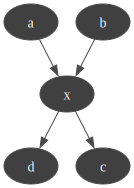

In [21]:
# Visualize the Bayesian network
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
# Visualize the Bayesian network with probabilities
gnb.showBN(bn)
gnb.sideBySide(bn.cpt('a'), captions=['P(a)'])
gnb.sideBySide(bn.cpt('b'), captions=['P(b)'])
gnb.sideBySide(bn.cpt('x'), captions=['P(x|a,b)'])
gnb.sideBySide(bn.cpt('c'), captions=['P(c|x)'])
gnb.sideBySide(bn.cpt('d'), captions=['P(d|x)'])



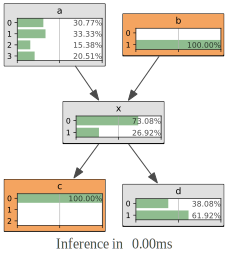

In [22]:
gnb.showInference(bn, evs={'c': 0, 'b': 1})
plt.show()

In [23]:
# Function to compute joint probability
def compute_joint_probability(bn, evidence):
    joint_prob = 1.0
    for var, value in evidence.items():
        parents = bn.parents(bn.idFromName(var))
        if len(parents) == 0:  # Root-Variable
            joint_prob *= bn.cpt(var)[value]
        else:
            parent_values = {bn.variable(p).name(): evidence[bn.variable(p).name()] for p in parents}
            joint_prob *= bn.cpt(var)[{**parent_values, var: value}]
    return joint_prob

In [24]:
evidence = {'a': 2, 'b': 0, 'x': 1, 'c': 2, 'd': 1}
joint_prob = compute_joint_probability(bn, evidence)
print(f"Die Wahrscheinlichkeit beträgt: {joint_prob:.2%}")

Die Wahrscheinlichkeit beträgt: 1.80%
